In [5]:
import torch
from transquest.algo.sentence_level.monotransquest.run_model import MonoTransQuestModel


model = MonoTransQuestModel("xlmroberta", "TransQuest/monotransquest-da-multilingual", num_labels=1, use_cuda=torch.cuda.is_available())
predictions, raw_outputs = model.predict([["Reducerea acestor conflicte este importantă pentru conservare.", "Reducing these conflicts is not important for preservation."]])
print(predictions)


/home/slim/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 

: 

In [ ]:
predictions, raw_outputs = model.predict([[\
    "the sentence is I am sick",\
    "la phrase est je suis malade"]])
print(predictions)

100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

0.7253174781799316


In [ ]:
predictions, raw_outputs = model.predict([[\
    "he is Some Guy who did the Some Company task",\
    "c'est une personne quelconque qui a fait la tâche une entreprise quelconque"]])
print(predictions)

100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

0.7204235196113586


In [ ]:
import pandas as pd 

pred = pd.read_csv("./output/predicted_quest++.csv")
pred.head()

,official,quest++
0,5.0,3.548300
1,2.5,3.055105
2,4.5,3.562239
3,5.0,3.659315
4,4.0,3.316752


In [ ]:
from metrics import pearsonr_metric, mae_metric, rmse_metric
print("quest++ results")
print(mae_metric(pred["official"],pred["quest++"]))
print(rmse_metric(pred["official"],pred["quest++"]))
print(pearsonr_metric(pred["official"],pred["quest++"]))

quest++ results
Mean absolute error: 0.751
Root mean squared error: 0.898
Pearson correlation coefficient: 0.491


In [ ]:
predictions, raw_outputs = model.predict([[\
    "Jackson appointed six justices to the Supreme Court .",\
    "Jackson ernannte sechs Richter am Obersten Gerichtshof ."]])
print(predictions)

100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

0.7347279787063599


In [ ]:
ref = "Die Katze ruht auf der Matte"
ref.split(" ")

['Die', 'Katze', 'ruht', 'auf', 'der', 'Matte']

In [ ]:
import nltk
from nltk.translate import meteor_score

nltk.download('wordnet')


# define the machine translation and reference translation
mt = "Die Katze ruht auf der Matte"
mt1 = "Die Katze befindet sich auf der Matte"
mt2 = "Auf der Matte ruht die Katze"
mt3 = "Die Katze hat sich auf der Matte niedergelassen"
# meteor does not put more attention to word order and paraphrasing
mt4 = "Die Katze %% mich nicht auf der Matte niedergelassen"
ref = "Die Katze liegt auf der Matte"

# calculate the METEOR score
score = meteor_score.meteor_score([ref.split()], mt3.split())

# print the METEOR score
print("METEOR score:", round(score,4))

[nltk_data] Downloading package wordnet to /home/slim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


METEOR score: 0.7806


In [ ]:
from nltk.translate import nist_score
import sacrebleu

# create reference and hypothesis lists
mts = [ref,
       "random random random random random",
       "Die Katze ruht auf der Matte",
       "Die Katze befindet sich auf der Matte",
       "Auf der Matte ruht die Katze",
       "Die Katze hat sich auf der Matte niedergelassen",
       "Die Katze %% mich nicht auf der Matte niedergelassen"]
ref = "Er wird nicht am 3"
for mt in mts:
    print(mt)
    # calculate the NIST score
    nist_score_res = (nist_score.sentence_nist([ref.split()], mt.split()))
    # print the NIST score
    print("NIST score:", nist_score_res)
    
    # calculate the METEOR score
    met_score = meteor_score.meteor_score([ref.split()], mt.split())

    # print the METEOR score
    print("METEOR score:", round(met_score,4))
    
#     # calculate the sacreBLEU score
#     sacrebleu_score = sacrebleu.corpus_bleu(mt, [ref]).score

#     # print the sacreBLEU score
#     print("sacreBLEU score:", sacrebleu_score)
    
    # calculate final score
    final_score = 0.8*met_score+0.2*(nist_score_res)
    
    # print final score
    print("final score:", round(final_score,4))

 - - - - -  
NIST score: 0.0
METEOR score: 0.0
final score: 0.0
Die Katze liegt auf der Matte
NIST score: 0.0
METEOR score: 0.0
final score: 0.0
Die Katze ruht auf der Matte
NIST score: 0.0
METEOR score: 0.0
final score: 0.0
Die Katze befindet sich auf der Matte
NIST score: 0.0
METEOR score: 0.0
final score: 0.0
Auf der Matte ruht die Katze
NIST score: 0.0
METEOR score: 0.0
final score: 0.0
Die Katze hat sich auf der Matte niedergelassen
NIST score: 0.0
METEOR score: 0.0
final score: 0.0
Die Katze %% mich nicht auf der Matte niedergelassen
NIST score: 0.2579920105430402
METEOR score: 0.0926
final score: 0.1257


In [ ]:
# grammaire avec la meme phrase
sen = ("yezt an right am den auf nicht rter Länge fun die in das yeah aber den am fon nich vin 72 Fuß ( ca. 22 Meter ).")
print(len(sen))
# calculate the NIST score
nist_score_res = (nist_score.sentence_nist([sen.split()], sen.split()))
# print the NIST score
print("NIST score:", nist_score_res)

111
NIST score: 4.760585507861475


In [ ]:
sen = ("weiter in westlicher Richtung überquerte der Hauptkanal ursprünglich die Gartsherrie Burn on Cotes Bridge , ein niedriges Aquädukt mit einer Länge von 72 Fuß ( ca. 22 Meter ).")
hyp = ("weiter an westlicher richtun überquerte dem kanal ursprünglich dem Gartsherrie Burn on Cotes Bridge , einne niedriges aqa mit einer lar ver 72 Fuß ( ca. 22 Meter ).")
print(len(sen))
# calculate the NIST score
nist_score_res = (nist_score.sentence_nist([sen.split()], hyp.split()))
# print the NIST score
print("NIST score:", nist_score_res)

175
NIST score: 3.3503317207776377


In [ ]:
tr_df = pd.read_fwf("./input/transquest/train.pe", header=None )
tr_df.drop(columns=[tr_df.columns[2],tr_df.columns[1]], inplace=True)
tr_df.rename(columns=dict(zip(tr_df.columns, ["sentence"])), inplace=True)
tr_df

,sentence
0,José Ortega y Gasset besuchte Husserl in Freib...
1,ein enttäuschender neunter Platz in China bede...
2,"in seinem Tagebuch schrieb Chase , dass die Fr..."
3,"schwere Arquebusen , die auf Wagen montiert wa..."
4,sobald der nordpazifische Lachs nach dem Laich...
...,...
6995,einige können auch unhygienische Praktiken wie...
6996,in den späten 1860er Jahren verschwanden die K...
6997,"Disco wurde als gedankenlos , verbraucherorien..."
6998,die Pflanzer füllten dann große Schweineköpfe ...


In [ ]:
def nist(sen):
    sen = str(sen)
    if len(sen)>20:
        return (nist_score.sentence_nist([sen.split()], sen.split()))
    else :
        return -1

In [ ]:
tr_df["len"] = tr_df["sentence"].apply(lambda x: len(x.split()))
tr_df.sort_values("len", ascending=True, inplace=True)
tr_df["nist"] = tr_df[tr_df["len"]>4]["sentence"].apply(nist )
tr_df

,sentence,len,nist
3016,1952 im japanischen Kolonialreich,4,NaN
370,amerikanische Wrestler italienischer Abstammung,4,NaN
635,Internationalisierungskampf um indische Unabhä...,4,NaN
2626,Befehlshaber der indonesischen Streitkräfte,4,NaN
4889,1945 im japanischen Kolonialreich,4,NaN
...,...,...,...
823,", und die Hessen begannen sich zu bewegen , w...",256,7.989006
561,", während Stephen King neben Regisseuren wie ...",344,8.429781
3606,"ein Jahrhundert lang eroberte , unterwarf und...",520,9.015536
4403,"die Kojen waren in Dreierreihen angeordnet , ...",812,9.660774


Text(0.5, 1.0, 'nist score according to sentence length for the same sentence')

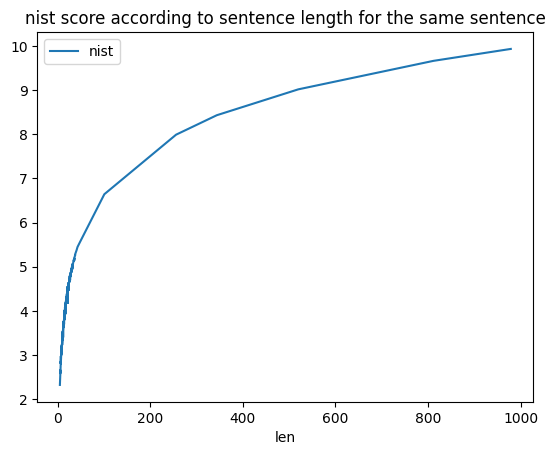

In [ ]:
plot = tr_df[tr_df["len"]>4].plot(x="len", y="nist")
plot.set_title("nist score according to sentence length for the same sentence")


In [ ]:
import math 
def nist_length_penalty(ref_len, hyp_len):
    """
    Calculates the NIST length penalty, from Eq. 3 in Doddington (2002)
        penalty = exp( beta * log( min( len(hyp)/len(ref) , 1.0 )))
    where,
        `beta` is chosen to make the brevity penalty factor = 0.5 when the
        no. of words in the system output (hyp) is 2/3 of the average
        no. of words in the reference translation (ref)
    The NIST penalty is different from BLEU's such that it minimize the impact
    of the score of small variations in the length of a translation.
    See Fig. 4 in  Doddington (2002)
    """
    ratio = hyp_len / ref_len
    if 0 < ratio < 1:
        ratio_x, score_x = 1.5, 0.5
        beta = math.log(score_x) / math.log(ratio_x) ** 2
        return math.exp(beta * math.log(ratio) ** 2)
    else:  # ratio <= 0 or ratio >= 1
        return max(min(ratio, 1.0), 0.0)

In [ ]:
def nist_length_penalty2(ref_len, hyp_len):
    """
        penalty = exp( beta * log( min( len(hyp)/len(ref) , 1.0 )))
    """
    ratio = hyp_len / ref_len
    if 0 < ratio < 1:
        ratio_x, score_x = 1.5, 0.5
        beta = math.log(score_x) / math.log(ratio_x) ** 2
        return math.exp(beta * math.log(ratio) ** 2)
    else:  # ratio <= 0 or ratio >= 1
        return max(min(ratio, 1.0), 0.0)

In [ ]:
tr_df["nist_balanced"] = tr_df.apply(lambda x : x["nist"]*nist_length_penalty(x["len"],x["len"]) , axis=1)
tr_df

,sentence,len,nist,nist_balanced
3016,1952 im japanischen Kolonialreich,4,NaN,NaN
370,amerikanische Wrestler italienischer Abstammung,4,NaN,NaN
635,Internationalisierungskampf um indische Unabhä...,4,NaN,NaN
2626,Befehlshaber der indonesischen Streitkräfte,4,NaN,NaN
4889,1945 im japanischen Kolonialreich,4,NaN,NaN
...,...,...,...,...
823,", und die Hessen begannen sich zu bewegen , w...",256,7.989006,7.989006
561,", während Stephen King neben Regisseuren wie ...",344,8.429781,8.429781
3606,"ein Jahrhundert lang eroberte , unterwarf und...",520,9.015536,9.015536
4403,"die Kojen waren in Dreierreihen angeordnet , ...",812,9.660774,9.660774


Text(0.5, 1.0, 'balanced nist score according to sentence length for the same sentence')

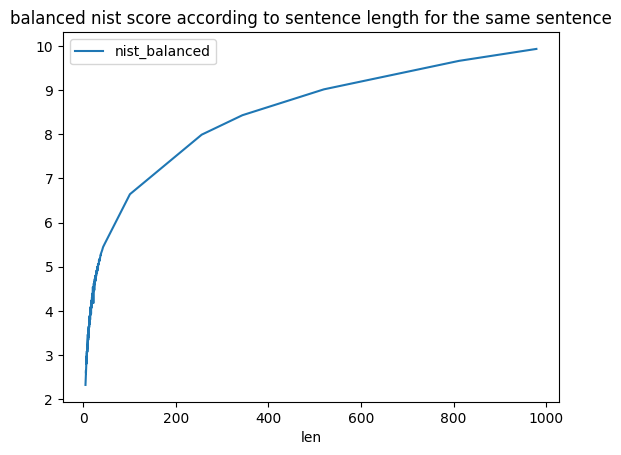

In [ ]:
plot = tr_df[tr_df["len"]>4].plot(x="len", y="nist_balanced")
plot.set_title("balanced nist score according to sentence length for the same sentence")

In [ ]:
tmp = tr_df["len"][156]
tmp

17

In [ ]:
nist_length_penalty(tmp,tmp)

1.0

In [ ]:
tr_df["penalty"] = tr_df["nist"].apply(lambda x : 5/x)
tr_df

,sentence,len,nist,nist_balanced,penalty
3016,1952 im japanischen Kolonialreich,4,NaN,NaN,NaN
370,amerikanische Wrestler italienischer Abstammung,4,NaN,NaN,NaN
635,Internationalisierungskampf um indische Unabhä...,4,NaN,NaN,NaN
2626,Befehlshaber der indonesischen Streitkräfte,4,NaN,NaN,NaN
4889,1945 im japanischen Kolonialreich,4,NaN,NaN,NaN
...,...,...,...,...,...
823,", und die Hessen begannen sich zu bewegen , w...",256,7.989006,7.989006,0.625860
561,", während Stephen King neben Regisseuren wie ...",344,8.429781,8.429781,0.593135
3606,"ein Jahrhundert lang eroberte , unterwarf und...",520,9.015536,9.015536,0.554598
4403,"die Kojen waren in Dreierreihen angeordnet , ...",812,9.660774,9.660774,0.517557


<AxesSubplot: xlabel='len'>

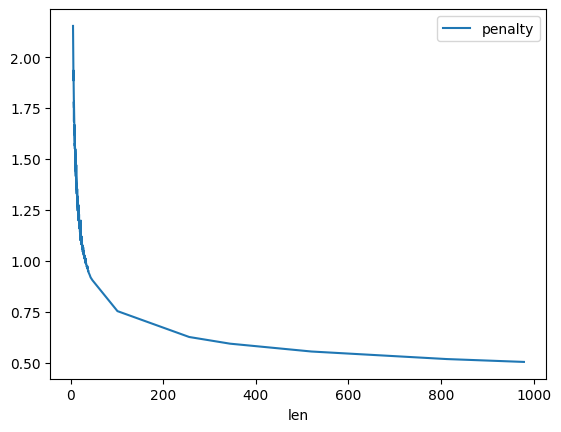

In [ ]:
tr_df.plot(x="len", y="penalty")

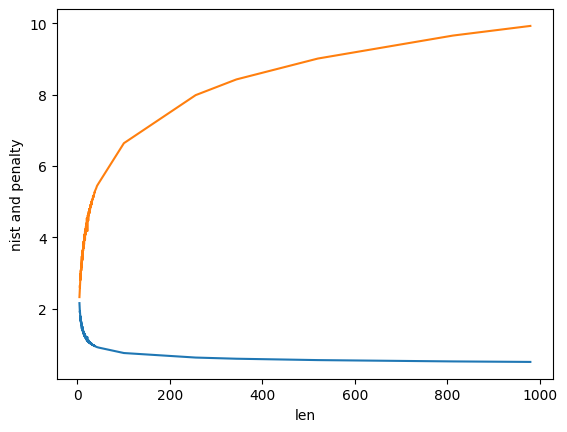

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(tr_df['len'], tr_df['penalty'], label='penalty')
ax.plot(tr_df['len'], tr_df['nist'], label='nist')
ax.set_xlabel('len')
ax.set_ylabel('nist and penalty')
plt.show()

In [ ]:
tr_df_nist = tr_df.dropna()
tr_df_nist

,sentence,len,nist,nist_balanced,penalty
5009,"US-Landwirtschaftsministerium , Landwirtschaft...",5,2.321928,2.321928,2.153383
4614,Aufbau organisatorischer Beziehungen zum Außen...,5,2.321928,2.321928,2.153383
5237,"Verschwörungstheorien , Desinformation und Bel...",5,2.321928,2.321928,2.153383
6682,abstimmbarer Exzitonenübergang in gekoppelten ...,5,2.321928,2.321928,2.153383
4055,1962 Entflechtungen im französischen Kolonialr...,5,2.321928,2.321928,2.153383
...,...,...,...,...,...
823,", und die Hessen begannen sich zu bewegen , w...",256,7.989006,7.989006,0.625860
561,", während Stephen King neben Regisseuren wie ...",344,8.429781,8.429781,0.593135
3606,"ein Jahrhundert lang eroberte , unterwarf und...",520,9.015536,9.015536,0.554598
4403,"die Kojen waren in Dreierreihen angeordnet , ...",812,9.660774,9.660774,0.517557


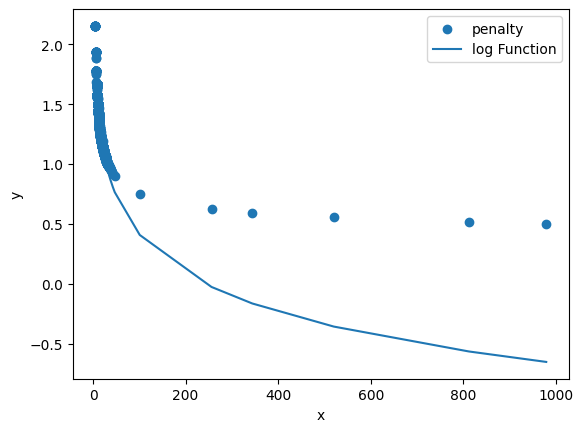

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def log_func(x, a, b):
    return a * np.log(x) + b



popt, pcov = curve_fit(log_func, tr_df_nist["len"], tr_df_nist["penalty"])

plt.scatter(tr_df_nist["len"], tr_df_nist["penalty"], label='penalty')
plt.plot(tr_df_nist["len"], log_func(tr_df_nist["len"], *popt), label='log Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


/home/slim/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


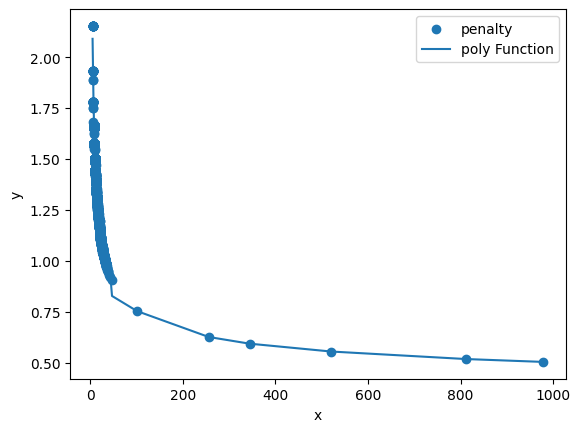

In [ ]:
coefficients = np.polyfit(tr_df_nist["len"], tr_df_nist["penalty"], 15)
f = np.poly1d(coefficients)

plt.scatter(tr_df_nist["len"], tr_df_nist["penalty"], label='penalty')
plt.plot(tr_df_nist["len"], f(tr_df_nist["len"]), label='poly Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
tr_df["nist_balanced_step2"] = tr_df.apply(lambda x : (x["nist"]*nist_length_penalty(x["len"],x["len"]))*(f(x["len"])) , axis=1)
tr_df

,sentence,len,nist,nist_balanced,penalty,nist_balanced_step2
3016,1952 im japanischen Kolonialreich,4,NaN,NaN,NaN,NaN
370,amerikanische Wrestler italienischer Abstammung,4,NaN,NaN,NaN,NaN
635,Internationalisierungskampf um indische Unabhä...,4,NaN,NaN,NaN,NaN
2626,Befehlshaber der indonesischen Streitkräfte,4,NaN,NaN,NaN,NaN
4889,1945 im japanischen Kolonialreich,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
823,", und die Hessen begannen sich zu bewegen , w...",256,7.989006,7.989006,0.625860,4.999999
561,", während Stephen King neben Regisseuren wie ...",344,8.429781,8.429781,0.593135,5.000001
3606,"ein Jahrhundert lang eroberte , unterwarf und...",520,9.015536,9.015536,0.554598,5.000011
4403,"die Kojen waren in Dreierreihen angeordnet , ...",812,9.660774,9.660774,0.517557,5.000078


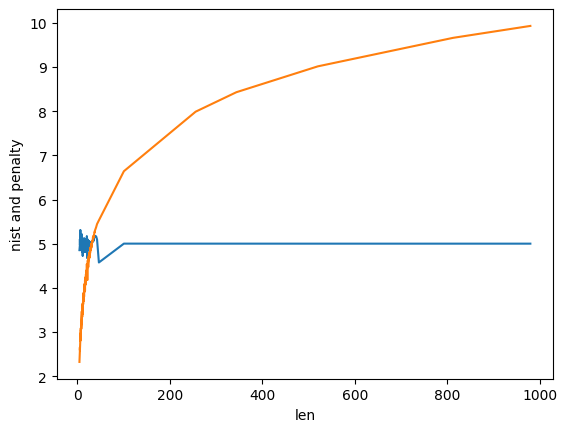

In [ ]:
fig, ax = plt.subplots()
ax.plot(tr_df['len'], tr_df['nist_balanced_step2'], label='penalty')
ax.plot(tr_df['len'], tr_df['nist'], label='nist')
ax.set_xlabel('len')
ax.set_ylabel('nist and penalty')
plt.show()

In [ ]:
tr_pe_df = pd.read_fwf("./input/transquest/train.pe", header=None )
tr_pe_df.drop(columns=tr_pe_df.columns[1:], inplace=True)
tr_pe_df.rename(columns=dict(zip(tr_pe_df.columns, ["pe"])), inplace=True)
tr_pe_df

,pe
0,José Ortega y Gasset besuchte Husserl in Freib...
1,ein enttäuschender neunter Platz in China bede...
2,"in seinem Tagebuch schrieb Chase , dass die Fr..."
3,"schwere Arquebusen , die auf Wagen montiert wa..."
4,sobald der nordpazifische Lachs nach dem Laich...
...,...
6995,einige können auch unhygienische Praktiken wie...
6996,in den späten 1860er Jahren verschwanden die K...
6997,"Disco wurde als gedankenlos , verbraucherorien..."
6998,die Pflanzer füllten dann große Schweineköpfe ...


In [ ]:
tr_mt_df = pd.read_fwf("./input/transquest/train.mt", header=None )
tr_mt_df.drop(columns=tr_mt_df.columns[1:], inplace=True)
tr_mt_df.rename(columns=dict(zip(tr_mt_df.columns, ["mt"])), inplace=True)
tr_mt_df

,mt
0,1934 besuchte José Ortega y Gasset Husserl in ...
1,eine enttäuschende Neunte in China bedeutete j...
2,"in seinem Tagebuch , Chase schrieb , dass die ..."
3,schwere Arquebuses auf Waggons montiert wurden...
4,sobald der nordpazifische Lachs nach dem Laich...
...,...
6995,einige können auch unhygienische Praktiken wie...
6996,in den späten 1860er Jahren verschwanden die K...
6997,"Disco wurde als geistlos , konsumistisch , übe..."
6998,die Pflanzer würden dann große Heuschrecken mi...


In [ ]:
tr_src_df = pd.read_fwf("./input/transquest/train.src", header=None )
tr_src_df.drop(columns=tr_src_df.columns[1:], inplace=True)
tr_src_df.rename(columns=dict(zip(tr_src_df.columns, ["src"])), inplace=True)
tr_src_df

,src
0,José Ortega y Gasset visited Husserl at Freibu...
1,"however , a disappointing ninth in China meant..."
2,"in his diary , Chase wrote that the release of..."
3,Heavy arquebuses mounted on wagons were called...
4,once North Pacific salmon die off after spawni...
...,...
6995,some may also discourage or disallow unsanitar...
6996,"in the late 1860s , the crinolines disappeared..."
6997,"disco was criticized as mindless , consumerist..."
6998,planters would then fill large hogsheads with ...


In [ ]:
final_df = pd.merge(tr_src_df, tr_mt_df , how='outer', left_index=True, right_index=True )
final_df

,src,mt
0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...
1,"however , a disappointing ninth in China meant...",eine enttäuschende Neunte in China bedeutete j...
2,"in his diary , Chase wrote that the release of...","in seinem Tagebuch , Chase schrieb , dass die ..."
3,Heavy arquebuses mounted on wagons were called...,schwere Arquebuses auf Waggons montiert wurden...
4,once North Pacific salmon die off after spawni...,sobald der nordpazifische Lachs nach dem Laich...
...,...,...
6995,some may also discourage or disallow unsanitar...,einige können auch unhygienische Praktiken wie...
6996,"in the late 1860s , the crinolines disappeared...",in den späten 1860er Jahren verschwanden die K...
6997,"disco was criticized as mindless , consumerist...","Disco wurde als geistlos , konsumistisch , übe..."
6998,planters would then fill large hogsheads with ...,die Pflanzer würden dann große Heuschrecken mi...


In [ ]:
final_df = pd.merge(final_df, tr_pe_df , how='outer', left_index=True, right_index=True )
final_df

,src,mt,pe
0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,José Ortega y Gasset besuchte Husserl in Freib...
1,"however , a disappointing ninth in China meant...",eine enttäuschende Neunte in China bedeutete j...,ein enttäuschender neunter Platz in China bede...
2,"in his diary , Chase wrote that the release of...","in seinem Tagebuch , Chase schrieb , dass die ...","in seinem Tagebuch schrieb Chase , dass die Fr..."
3,Heavy arquebuses mounted on wagons were called...,schwere Arquebuses auf Waggons montiert wurden...,"schwere Arquebusen , die auf Wagen montiert wa..."
4,once North Pacific salmon die off after spawni...,sobald der nordpazifische Lachs nach dem Laich...,sobald der nordpazifische Lachs nach dem Laich...
...,...,...,...
6995,some may also discourage or disallow unsanitar...,einige können auch unhygienische Praktiken wie...,einige können auch unhygienische Praktiken wie...
6996,"in the late 1860s , the crinolines disappeared...",in den späten 1860er Jahren verschwanden die K...,in den späten 1860er Jahren verschwanden die K...
6997,"disco was criticized as mindless , consumerist...","Disco wurde als geistlos , konsumistisch , übe...","Disco wurde als gedankenlos , verbraucherorien..."
6998,planters would then fill large hogsheads with ...,die Pflanzer würden dann große Heuschrecken mi...,die Pflanzer füllten dann große Schweineköpfe ...


In [ ]:
from nltk.translate import nist_score

# create reference and hypothesis lists
mts = [ref,
       "random random random random random",
       "Die Katze ruht auf der Matte",
       "Die Katze befindet sich auf der Matte",
       "Auf der Matte ruht die Katze",
       "Die Katze hat sich auf der Matte niedergelassen",
       "Die Katze hat mich nicht auf der Matte niedergelassen",
       "die Katze %% mich auf der Matte niedergelassen"]
ref = "Die Katze leigt auf der Matte"
for mt in mts:
    print(mt)
    # calculate the NIST score
    nist_score_res = (nist_score.sentence_nist([ref.split()], mt.split()))
    print("NIST score:", nist_score_res)
    
    # calculate the METEOR score
    met_score = meteor_score.meteor_score([ref.split()], mt.split())
    print("METEOR score:", round(met_score,4))
    
    # calculate final score
    final_score = 0.8*met_score+0.2*(nist_score_res)
    # print("final score:", round(final_score,4))

men puts on white shirt ,  of various colors , turbans , sarongs , lungis , dhutis , leather shoes , and belts to wrap their robes on the waist .
NIST score: 0.0
METEOR score: 0.0
random random random random random
NIST score: 0.0
METEOR score: 0.0
Die Katze ruht auf der Matte
NIST score: 2.15413541726763
METEOR score: 0.8067
Die Katze befindet sich auf der Matte
NIST score: 1.846401786229397
METEOR score: 0.7934
Auf der Matte ruht die Katze
NIST score: 1.292481250360578
METEOR score: 0.8067
Die Katze hat sich auf der Matte niedergelassen
NIST score: 1.6156015629507225
METEOR score: 0.7806
Die Katze hat mich nicht auf der Matte niedergelassen
NIST score: 1.43609027817842
METEOR score: 0.7683
die Katze %% mich auf der Matte niedergelassen
NIST score: 1.292481250360578
METEOR score: 0.7806


In [ ]:
def mtr_score(ref, mt):
    return round(meteor_score.meteor_score([ref.split()], mt.split()),6)

def nst_score(ref,mt):
    if (len(ref.split())<6) or (len(mt.split())<6):
        return mtr_score(ref,mt)
    else : 
        return round((nist_score.sentence_nist([ref.split()], mt.split())),6)

def nst_blc_score(ref,mt):
    return round(nst_score(ref,mt)*f(len(ref.split())),6)

def final_score(ref,mt):
    return round(0.8*mtr_score(ref,mt)+0.2*(nst_blc_score(ref,mt)/5),6)

In [ ]:
# final_df["avg_len"] = final_df.apply(lambda x : round((len(x["mt"].split())+len(x["pe"].split())+len(x["src"].split())/3),2) , axis=1)
final_df["ref_len"] = final_df.apply(lambda x : len(x["pe"].split()) , axis=1)
final_df.head(2)

,src,mt,pe,avg_len,mtr_score,ref_len,nst_score,nst_blc_score,final_score
0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,José Ortega y Gasset besuchte Husserl in Freib...,12,0.794492,12,3.116148,-4.741600,0.445930
1,"however , a disappointing ninth in China meant...",eine enttäuschende Neunte in China bedeutete j...,ein enttäuschender neunter Platz in China bede...,20,0.903902,20,3.608044,366.737373,15.392617


In [ ]:
final_df[final_df["ref_len"]<5]

,src,mt,pe,avg_len,mtr_score,ref_len,nst_score,nst_blc_score,final_score
370,American professional wrestlers of Italian des...,amerikanische professionelle Wrestler italieni...,amerikanische Wrestler italienischer Abstammung,4,0.914634,4,0.914634,0.756768,0.761978
654,internationalising struggle for Indian indepen...,Internationalisierung des Kampfes für die Unab...,Internationalisierungskampf um indische Unabhä...,4,0.116279,4,0.116279,0.036573,0.094486
2664,commanders of the Indonesian National Armed Fo...,Navigationsleiste Kommandeure der indonesische...,Befehlshaber der indonesischen Streitkräfte,4,0.718157,4,0.718157,0.672453,0.601424
3054,1952 disestablishments in the Japanese colonia...,aufgelöst 1952 im japanischen Kolonialreich,1952 im japanischen Kolonialreich,4,0.967988,4,0.967988,0.964946,0.812988
5066,1945 disestablishments in the Japanese colonia...,1945 Aufgelöst im japanischen Kolonialreich,1945 im japanischen Kolonialreich,4,0.914634,4,0.914634,0.911760,0.768178


In [ ]:
final_df["mtr_score"] = final_df.apply( lambda x : mtr_score(x["pe"],x["mt"]) , axis=1)

In [ ]:
final_df["nst_score"] = final_df.apply( lambda x : nst_score(x["pe"],x["mt"]) , axis=1)

In [ ]:
final_df["nst_blc_score"] = final_df.apply( lambda x : nst_blc_score(x["pe"],x["mt"]) , axis=1)
final_df["final_score"] = final_df.apply( lambda x : final_score(x["pe"],x["mt"]) , axis=1)

In [ ]:
final_df

,src,mt,pe,avg_len,mtr_score,ref_len,nst_score,nst_blc_score,final_score
0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,José Ortega y Gasset besuchte Husserl in Freib...,12,0.794492,12,3.116148,4.331309,0.808846
1,"however , a disappointing ninth in China meant...",eine enttäuschende Neunte in China bedeutete j...,ein enttäuschender neunter Platz in China bede...,20,0.903902,20,3.608044,4.174426,0.890099
2,"in his diary , Chase wrote that the release of...","in seinem Tagebuch , Chase schrieb , dass die ...","in seinem Tagebuch schrieb Chase , dass die Fr...",23,0.782187,23,3.736856,4.120092,0.790553
3,Heavy arquebuses mounted on wagons were called...,schwere Arquebuses auf Waggons montiert wurden...,"schwere Arquebusen , die auf Wagen montiert wa...",17,0.467480,17,1.504230,1.838668,0.447531
4,once North Pacific salmon die off after spawni...,sobald der nordpazifische Lachs nach dem Laich...,sobald der nordpazifische Lachs nach dem Laich...,18,0.621547,18,2.633637,3.157613,0.623542
...,...,...,...,...,...,...,...,...,...
6995,some may also discourage or disallow unsanitar...,einige können auch unhygienische Praktiken wie...,einige können auch unhygienische Praktiken wie...,16,0.873724,16,3.508333,4.378120,0.874104
6996,"in the late 1860s , the crinolines disappeared...",in den späten 1860er Jahren verschwanden die K...,in den späten 1860er Jahren verschwanden die K...,19,0.839330,19,3.504074,4.125297,0.836476
6997,"disco was criticized as mindless , consumerist...","Disco wurde als geistlos , konsumistisch , übe...","Disco wurde als gedankenlos , verbraucherorien...",12,0.717078,12,2.612964,3.631905,0.718939
6998,planters would then fill large hogsheads with ...,die Pflanzer würden dann große Heuschrecken mi...,die Pflanzer füllten dann große Schweineköpfe ...,14,0.543735,14,2.284413,2.989721,0.554577


<AxesSubplot: xlabel='ref_len', ylabel='mtr_score'>

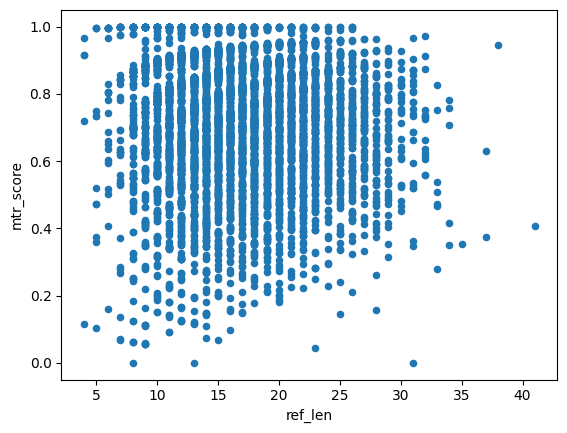

In [ ]:
final_df.plot.scatter(x="ref_len",y="mtr_score")

<AxesSubplot: xlabel='ref_len', ylabel='nst_score'>

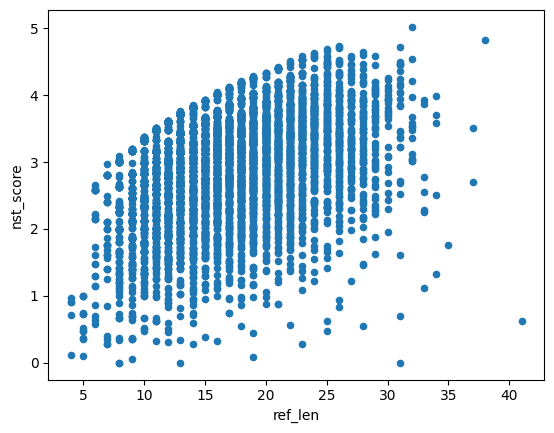

In [ ]:
final_df.plot.scatter(x="ref_len",y="nst_score")

<AxesSubplot: xlabel='ref_len', ylabel='nst_blc_score'>

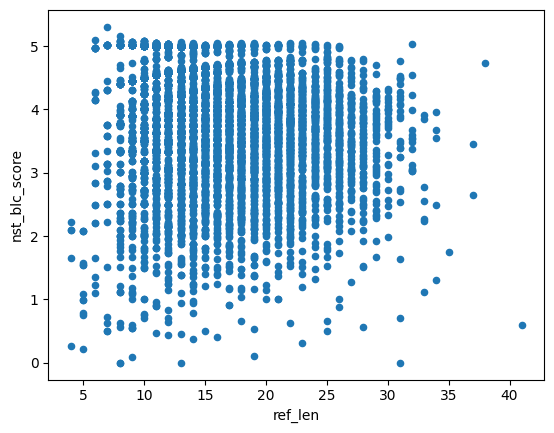

In [ ]:
final_df.plot.scatter(x="ref_len",y="nst_blc_score")

<AxesSubplot: xlabel='ref_len', ylabel='final_score'>

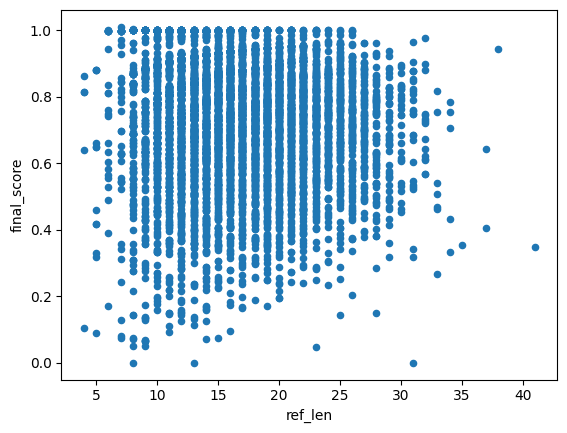

In [ ]:
final_df.plot.scatter(x="ref_len",y="final_score")

In [ ]:
final_df.plot.scatter(x="ref_len",y="mtr_score")

In [ ]:
def transquest_model(src, tgt):    
    predictions, _ = model.predict([[src,tgt]])
    return round(predictions.item(),6)

In [ ]:
# uncommenet to get results  
# final_df["transquest"] = final_df.apply( lambda x : transquest_model(x["src"], x["mt"]) , axis=1)

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


In [ ]:
# uncomment to save results 
# final_df.to_csv("output_quest.csv")

In [ ]:
n = 0
src = final_df["src"][n]
tgt = final_df["mt"] [n]
print(f"{src}\n{tgt}")
transquest_model(src, tgt)

In [1]:
from metrics import pearsonr_metric, mae_metric, rmse_metric
import pandas as pd
tquest_df = pd.read_csv("output_quest.csv")

tquest_df.head(3)

,Unnamed: 0,src,mt,pe,avg_len,mtr_score,ref_len,nst_score,nst_blc_score,final_score,transquest
0,0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,José Ortega y Gasset besuchte Husserl in Freib...,12,0.794492,12,3.116148,4.331309,0.808846,0.744348
1,1,"however , a disappointing ninth in China meant...",eine enttäuschende Neunte in China bedeutete j...,ein enttäuschender neunter Platz in China bede...,20,0.903902,20,3.608044,4.174426,0.890099,0.733772
2,2,"in his diary , Chase wrote that the release of...","in seinem Tagebuch , Chase schrieb , dass die ...","in seinem Tagebuch schrieb Chase , dass die Fr...",23,0.782187,23,3.736856,4.120092,0.790553,0.702712


In [2]:
print("transquest results")
print(mae_metric(tquest_df["final_score"],tquest_df["transquest"]))
print(rmse_metric(tquest_df["final_score"],tquest_df["transquest"]))
print(pearsonr_metric(tquest_df["final_score"],tquest_df["transquest"]))


transquest results
Mean absolute error: 0.141
Root mean squared error: 0.176
Pearson correlation coefficient: 0.292


In [6]:
print("transquest results vs mtr_score")
print(mae_metric(tquest_df["mtr_score"],tquest_df["transquest"]))
print(rmse_metric(tquest_df["mtr_score"],tquest_df["transquest"]))
print(pearsonr_metric(tquest_df["mtr_score"],tquest_df["transquest"]))

transquest results vs mtr_score
Mean absolute error: 0.144
Root mean squared error: 0.180
Pearson correlation coefficient: 0.290


In [9]:
print("transquest results vs nist ")
print(mae_metric(tquest_df["nst_score"]/10,tquest_df["transquest"]))
print(rmse_metric(tquest_df["nst_score"]/10,tquest_df["transquest"]))
print(pearsonr_metric(tquest_df["nst_score"]/10,tquest_df["transquest"]))

transquest results vs nist 
Mean absolute error: 0.433
Root mean squared error: 0.439
Pearson correlation coefficient: 0.171
